### 1.1 Problem Statement
The streaming industry is rapidly growing, and understanding what drives a movie's popularity is crucial for platforms and content creators. This project analyzes the relationship between movie attributes, particularly release year, and their popularity on streaming platforms. By combining Netflix and movie datasets into a clean, unified dataset, the study explores trends in popularity over time. The results aim to inform strategic decisions for content selection and distribution.

### 1.2 Data Gathering
#### Dataset 1: Netflix Movies Metadata
#### Manual download from Kaggle

In [ ]:
import pandas as pd
df_netflix = pd.read_csv('movies_metadata.csv', low_memory=False)
df_netflix.head()

### Source and Gathering Method:
This dataset was manually downloaded from Kaggle, ensuring it comes from a reliable and publicly available source. It contains rich metadata for over 45,000 movies, providing diverse variables such as genres, budget, revenue, release date, and vote average that are essential for analysis.

### Justification:
This dataset was selected because it includes multiple data quality and tidiness issues, such as missing values, incorrect data types, and nested JSON fields, which make it highly suitable for demonstrating practical data wrangling and cleaning techniques. Moreover, it offers valuable insights into global movie trends and performance metrics relevant to entertainment data analysis.
#### Why this dataset?
It contains rich metadata for over 45,000 movies, including genres, budget, revenue, release_date, and vote_average. It also includes quality and tidiness issues (e.g., missing values, nested JSON fields) that are ideal for demonstrating data wrangling skills.

#### progaramticly download from kaggel dataset 2

In [186]:
!python -m pip install kaggle==1.6.12

In [187]:
import kagglehub
path = kagglehub.dataset_download("shivamb/netflix-shows")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\hp\.cache\kagglehub\datasets\shivamb\netflix-shows\versions\5


### "We can also use this code to show the exact file name"

In [188]:
import os

print(os.listdir(path))


['netflix_titles.csv']


In [189]:
#import pandas as pd

#file_path = r"C:\Users\hp\.cache\kagglehub\datasets\shivamb\netflix-shows\versions\5\netflix_titles.csv"
#df_movies = pd.read_csv(file_path)

import pandas as pd
df_movies = pd.read_csv('netflix_titles.csv', low_memory=False)
df_movies.head()


show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

### Source and Gathering Method:
This dataset was programmatically downloaded from Kaggle using the official Kaggle API. The file netflix_titles.csv contains detailed information about Netflix movies and TV shows, including variables such as title, director, cast, country, release year, rating, duration, listed genres, and description.

### Justification:
This dataset was chosen because it complements the first dataset by providing Netflix-specific content metadata, which allows for meaningful comparisons and merging with the broader movie dataset. It also contains tidiness challenges such as multiple values stored in a single column (e.g., listed_in), making it an ideal dataset to demonstrate skills in data normalization, restructuring, and merging.

### Assessment
Dataset 1 - Data Quality Issue

In [190]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

* Several columns such as belongs_to_collection (only 4,494 non-null out of 45,466), homepage, overview, and tagline have many missing values.
* Columns like budget, popularity, and id are stored as object instead of numeric.
* Columns like adult, video, and homepage provide little to no analytical value.
  
 The dataset shows several quality problems. Columns such as belongs_to_collection, homepage, overview, and tagline have a large number of missing values, which reduce the completeness of the dataset. Columns like budget, popularity, and id are stored as objects instead of numeric types, leading to difficulties in performing quantitative analysis. Moreover, variables such as adult, video, and homepage provide little to no analytical value and can be safely removed.

### Justification:
These issues affect the dataset’s reliability and make statistical analysis inaccurate. Missing and incorrectly typed values must be cleaned or converted to ensure consistent formats. Removing low-value columns will simplify the dataset and improve performance during merging and analysis.

### Dataset 2 - Data Quality Issue

In [191]:
df_movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


such as director (2634 missing), cast (825 missing), country (831 missing), date_added (10 missing), rating (4 missing), and duration (3 missing), which may affect the accuracy of the analysis. Additionally, the date_added column is stored as text instead of a proper date format, requiring conversion to a datetime type for accurate time-based analysis. There are also inconsistencies in text formatting within columns like type and country, where capitalization varies, indicating the need for standardization to ensure data consistency and reliability.

### Justification:
These issues can lead to inaccurate results and unreliable insights if left unaddressed. Converting data types, filling or removing missing values, and standardizing text formatting are essential steps to maintain the integrity and usability of the dataset. Properly cleaning these problems ensures that the data is ready for merging and accurate comparative analysis with the first dataset.

### Dataset 1 - Data Tidiness Issue

In [192]:
df_netflix.isnull().sum()
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

The assessment indicates that several columns in the dataset contain missing values. For instance, belongs_to_collection (40,972 missing), homepage (37,684 missing), and tagline (25,054 missing) have a significant amount of null entries, while other columns such as overview, release_date, and runtime have fewer missing values. Columns like genres, spoken_languages, and production_companies also contain nested JSON structures, making them untidy since multiple values are stored within a single column instead of being split across rows or columns.

### Justification:
These issues violate the principles of tidy data, where each variable should form a column and each observation a row. The nested or combined values within columns make it difficult to perform analysis, filtering, or aggregation. Cleaning and restructuring these columns will enhance data usability, allowing for more accurate insights and easier merging with other datasets.

### Dataset 2 - Data Tidiness Issue

In [193]:
df_movies.isnull().sum()
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


The inspection of the dataset shows that some columns contain missing values that could affect data quality and analysis accuracy. In particular, the director column has 2,634 missing entries, while cast (825 missing), country (831 missing), date_added (10 missing), rating (4 missing), and duration (3 missing) also contain incomplete data.

These missing values can lead to inconsistencies, especially when analyzing relationships between production teams, regions, or audience ratings. To handle this issue, appropriate cleaning steps should be applied — for example, replacing missing text values with “Unknown” and dropping rows only when essential fields (like title or type) are missing.

Overall, the dataset remains mostly tidy since each variable has its own column and each record corresponds to one movie or show, but it still requires handling of missing values to ensure complete and reliable analysis.

## 3. Clean data
#### Dataset 1 - Data Quality Issue

In [194]:
numeric_columns_netflix = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']

for col in numeric_columns_netflix:
    if col in df_netflix.columns:
        df_netflix[col] = pd.to_numeric(df_netflix[col], errors='coerce')

for col in numeric_columns_netflix:
    df_netflix[col] = df_netflix[col].fillna(df_netflix[col].median())


In [195]:
# Fill Missing Values for df_netflix
text_columns_netflix = [
    'belongs_to_collection', 'homepage', 'imdb_id', 'original_language', 
    'overview', 'poster_path', 'production_companies', 'production_countries', 
    'status', 'tagline', 'title', 'video', 'spoken_languages'
]
numeric_columns_netflix = ['budget', 'popularity', 'runtime', 'revenue', 'vote_average', 'vote_count']

for col in text_columns_netflix:
    if col in df_netflix.columns:
        df_netflix[col] = df_netflix[col].fillna('Unknown')

for col in numeric_columns_netflix:
    if col in df_netflix.columns:
        df_netflix[col] = df_netflix[col].fillna(df_netflix[col].median())

#  Convert data types
df_netflix['release_date'] = pd.to_datetime(df_netflix['release_date'], errors='coerce')

# Split multi-value columns into lists
multi_value_columns = ['genres', 'production_companies', 'production_countries', 'spoken_languages']
for col in multi_value_columns:
    if col in df_netflix.columns:
        df_netflix[col] = df_netflix[col].astype(str).str.split(',')


In [196]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45466 non-null  object        
 1   belongs_to_collection  45466 non-null  object        
 2   budget                 45466 non-null  float64       
 3   genres                 45466 non-null  object        
 4   homepage               45466 non-null  object        
 5   id                     45466 non-null  object        
 6   imdb_id                45466 non-null  object        
 7   original_language      45466 non-null  object        
 8   original_title         45466 non-null  object        
 9   overview               45466 non-null  object        
 10  popularity             45466 non-null  float64       
 11  poster_path            45466 non-null  object        
 12  production_companies   45466 non-null  object        
 13  p

#### In this step, several cleaning operations were applied to improve the Netflix dataset’s quality and ensure consistency in the data structure.
### Handling Missing Values:
For text columns (e.g., homepage, overview, tagline, spoken_languages), all missing values were replaced with "Unknown" to maintain data completeness.
For numeric columns (budget, popularity, runtime, revenue, vote_average, vote_count), missing values were filled using the median of each column to prevent skewing the data.
### Converting Data Types:
The release_date column was converted to the datetime format to allow proper time-based analysis. Any invalid or missing dates were safely coerced into NaT.
### Tidying Multi-value Columns:
Columns that contained multiple values in a single cell (such as genres, production_companies, production_countries, and spoken_languages) were split into lists for better data organization and accessibility.
### Final Verification:
After cleaning, the dataset was checked using df_netflix.info() to confirm that all missing values were properly handled and that data types were correctly assigned.
### Result:
The dataset is now clean, consistent, and ready for analysis. All missing entries have been managed appropriately, and data types were standardized to improve reliability and usability.

### Dataset 2 – Data Quality Issue

In [197]:
df_movies.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [198]:
# Step 1: Handle missing values
# Fill missing text-based columns with 'Unknown'
text_columns_netflix = ['director', 'cast', 'country', 'date_added', 'rating', 'duration']
for col in text_columns_netflix:
    if col in df_movies.columns:  # check to avoid KeyError
        df_movies[col] = df_movies[col].fillna('Unknown')

# Step 2: Convert data types
# Convert 'date_added' to datetime for accurate time-based analysis
df_movies['date_added'] = pd.to_datetime(df_movies['date_added'], errors='coerce')

# Step 3: Clean 'duration' column
# Separate duration into two columns: number and unit (e.g., 90 min → 90, 'min')
df_movies['duration_value'] = df_movies['duration'].str.extract('(\d+)')
df_movies['duration_unit'] = df_movies['duration'].str.extract('([a-zA-Z]+)')


In [199]:
df_movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8807 non-null   object        
 1   type            8807 non-null   object        
 2   title           8807 non-null   object        
 3   director        8807 non-null   object        
 4   cast            8807 non-null   object        
 5   country         8807 non-null   object        
 6   date_added      8709 non-null   datetime64[ns]
 7   release_year    8807 non-null   int64         
 8   rating          8807 non-null   object        
 9   duration        8807 non-null   object        
 10  listed_in       8807 non-null   object        
 11  description     8807 non-null   object        
 12  duration_value  8804 non-null   object        
 13  duration_unit   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(12)
memory usage:

In this step, several cleaning operations were applied to improve the Netflix titles dataset’s quality and make it analysis-ready.

### Handling Missing Values:
Text-based columns (director, cast, country, date_added, rating, duration) contained missing entries. These were filled with "Unknown" to ensure completeness and avoid errors in later analysis.
### Converting Data Types:
The date_added column was converted to datetime format to allow proper time-based analysis. Invalid or missing dates were coerced into NaT.
### Tidying Multi-value Columns:
The duration column contained both numeric values and units (e.g., "90 min" or "2 Seasons"). This column was split into two separate columns:
duration_value → numeric part (e.g., 90)
duration_unit → unit part (e.g., min or Season)
This improves data tidiness and facilitates numeric or categorical analyses.
### Result:
The dataset is now clean, with missing values handled, the date column standardized, and the multi-value duration column separated. This ensures consistent, reliable, and analysis-ready data for subsequent steps.

### Dataset 1 – Data Tidiness Issue

Drop unnecessary variables

In [200]:
df_netflix.drop(['homepage', 'poster_path'], axis=1, inplace=True)
df_movies.drop(['cast'], axis=1, inplace=True)

Irrelevant columns such as 'homepage' and 'poster_path' were removed to simplify analysis and reduce noise

In [201]:
import pandas as pd

subset_cols = [col for col in df_netflix.columns 
               if col not in ['genres', 'production_companies', 'production_countries', 'spoken_languages']]
df_netflix = df_netflix.drop_duplicates(subset=subset_cols)

text_columns = ['belongs_to_collection', 'homepage', 'imdb_id', 'original_language',
                'overview', 'poster_path', 'production_companies', 
                'production_countries', 'status', 'tagline', 'title', 'video']

for col in text_columns:
    if col in df_netflix.columns:
        df_netflix.loc[:, col] = df_netflix[col].astype(str).str.lower().str.strip()
        df_netflix.loc[:, col] = df_netflix[col].replace('nan', 'unknown')

numeric_columns = ['budget', 'popularity', 'runtime', 'revenue', 'vote_average', 'vote_count']

# Convert to numeric (coerce errors) and fill missing values with median
for col in numeric_columns:
    if col in df_netflix.columns:
        df_netflix[col] = pd.to_numeric(df_netflix[col], errors='coerce')
        df_netflix[col] = df_netflix[col].fillna(df_netflix[col].median())

if 'release_date' in df_netflix.columns:
    df_netflix['release_date'] = pd.to_datetime(df_netflix['release_date'], errors='coerce')

for col in df_netflix.select_dtypes(include='object').columns:
    df_netflix[col] = df_netflix[col].astype(str).str.lower().str.strip()

df_netflix.info()
df_netflix.head()

<class 'pandas.core.frame.DataFrame'>
Index: 45449 entries, 0 to 45465
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45449 non-null  object        
 1   belongs_to_collection  45449 non-null  object        
 2   budget                 45449 non-null  float64       
 3   genres                 45449 non-null  object        
 4   id                     45449 non-null  object        
 5   imdb_id                45449 non-null  object        
 6   original_language      45449 non-null  object        
 7   original_title         45449 non-null  object        
 8   overview               45449 non-null  object        
 9   popularity             45449 non-null  float64       
 10  production_companies   45449 non-null  object        
 11  production_countries   45449 non-null  object        
 12  release_date           45359 non-null  datetime64[ns]
 13  revenu

adult                              belongs_to_collection      budget  \
0  false  {'id': 10194, 'name': 'toy story collection', ...  30000000.0   
1  false                                            unknown  65000000.0   
2  false  {'id': 119050, 'name': 'grumpy old men collect...         0.0   
3  false                                            unknown  16000000.0   
4  false  {'id': 96871, 'name': 'father of the bride col...         0.0   

                                              genres     id    imdb_id  \
0  ["[{'id': 16", " 'name': 'animation'}", " {'id...    862  tt0114709   
1  ["[{'id': 12", " 'name': 'adventure'}", " {'id...   8844  tt0113497   
2  ["[{'id': 10749", " 'name': 'romance'}", " {'i...  15602  tt0113228   
3  ["[{'id': 35", " 'name': 'comedy'}", " {'id': ...  31357  tt0114885   
4              ["[{'id': 35", " 'name': 'comedy'}]"]  11862  tt0113041   

  original_language               original_title  \
0                en                    toy story   
1                en                      jumanji   
2                en             grumpier old men   
3                en            waiting to exhale   
4                en  father of the bride part ii   

                                            overview  popularity  ...  \
0  led by woody, andy's toys live happily in his ...   21.946943  ...   
1  when siblings judy and peter discover an encha...   17.015539  ...   
2  a family wedding reignites the ancient feud be...   11.712900  ...   
3  cheated on, mistreated and stepped on, the wom...    3.859495  ...   
4  just when george banks has recovered from his ...    8.387519  ...   

  release_date      revenue runtime  \
0   1995-10-30  373554033.0    81.0   
1   1995-12-15  262797249.0   104.0   
2   1995-12-22          0.0   101.0   
3   1995-12-22   81452156.0   127.0   
4   1995-02-10   76578911.0   106.0   

                                    spoken_languages    status  \
0    ["[{'iso_639_1': 'en'", " 'name': 'english'}]"]  released   
1  ["[{'iso_639_1': 'en'", " 'name': 'english'}",...  released   
2    ["[{'iso_639_1': 'en'", " 'name': 'english'}]"]  released   
3    ["[{'iso_639_1': 'en'", " 'name': 'english'}]"]  released   
4    ["[{'iso_639_1': 'en'", " 'name': 'english'}]"]  released   

                                             tagline  \
0                                            unknown   
1          roll the dice and unleash the excitement!   
2  still yelling. still fighting. still ready for...   
3  friends are the people who let you be yourself...   
4  just when his world is back to normal... he's ...   

                         title  video vote_average vote_count  
0                    toy story  false          7.7     5415.0  
1                      jumanji  false          6.9     2413.0  
2             grumpier old men  false          6.5       92.0  
3            waiting to exhale  false          6.1       34.0  
4  father of the bride part ii  false          5.7      173.0  

[5 rows x 22 columns]

### The tidiness cleaning for Dataset 1 aimed to simplify the dataset and ensure analytical consistency:

Irrelevant columns such as homepage and poster_path were removed to reduce noise and focus on relevant variables.
Duplicate rows were removed so that each observation represents a unique movie.
Text columns were standardized by converting to lowercase, stripping whitespace, and replacing missing values with "unknown" to maintain uniformity.
Numeric columns were converted to proper numeric types and missing values were filled with the median to enable accurate calculations.
The release_date column was converted to datetime to facilitate time-based analyses.
### Outcome:
The dataset now contains 22 columns with clean, consistent, and ready-to-analyze data.
Each observation is unique, numeric columns are valid for analysis, text columns are standardized, and date fields are correctly formatted.

### Dataset 2 – Data Tidiness Issue

In [202]:
#  missing values 
# Fill missing 'date_added' with a placeholder value
df_movies['date_added'] = df_movies['date_added'].fillna(pd.Timestamp('1900-01-01'))

# Fill missing 'duration_value' with median or a placeholder
df_movies['duration_value'] = df_movies['duration_value'].fillna('unknown')

#  Standardize text columns 
# Convert object/string columns to lowercase and strip whitespace
for col in df_movies.select_dtypes(include='object').columns:
    df_movies[col] = df_movies[col].astype(str).str.lower().str.strip()


In [203]:
df_movies['listed_in'] = df_movies['listed_in'].apply(lambda x: [i.strip() for i in x.split(',')])

In [204]:
df_movies.isnull().sum() 
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8807 non-null   object        
 1   type            8807 non-null   object        
 2   title           8807 non-null   object        
 3   director        8807 non-null   object        
 4   country         8807 non-null   object        
 5   date_added      8807 non-null   datetime64[ns]
 6   release_year    8807 non-null   int64         
 7   rating          8807 non-null   object        
 8   duration        8807 non-null   object        
 9   listed_in       8807 non-null   object        
 10  description     8807 non-null   object        
 11  duration_value  8807 non-null   object        
 12  duration_unit   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 894.6+ KB


In [205]:
df_exploded = df_movies.explode('listed_in')

In [206]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         8807 non-null   object        
 1   type            8807 non-null   object        
 2   title           8807 non-null   object        
 3   director        8807 non-null   object        
 4   country         8807 non-null   object        
 5   date_added      8807 non-null   datetime64[ns]
 6   release_year    8807 non-null   int64         
 7   rating          8807 non-null   object        
 8   duration        8807 non-null   object        
 9   listed_in       8807 non-null   object        
 10  description     8807 non-null   object        
 11  duration_value  8807 non-null   object        
 12  duration_unit   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 894.6+ KB


### The tidiness cleaning for Dataset 2 focused on structuring the multi-valued columns and ensuring each observation represents a single unit:
The listed_in column was exploded so that each genre or category occupies its own row. This ensures that each row represents a single observation for accurate analysis and satisfies tidy data principles.
Data types for all columns were verified and kept consistent (datetime for dates, numeric for release_year, object for text).
Duration columns (duration_value and duration_unit) were preserved to allow numeric analyses and comparisons based on length.
### Outcome:
Dataset 2 now adheres to tidy data standards, with each row representing a single observation.
Multi-value categories have been normalized, making the dataset ready for analysis by genre or type.

### Dataset Merging

In [207]:
import pandas as pd

list_columns = ['listed_in']

for col in list_columns:
    df_movies[col] = df_movies[col].apply(lambda x: str(x))

print(df_movies.duplicated().sum())

df_movies.drop_duplicates(inplace=True)
#let's check
print(df_movies.shape)


0
(8807, 13)


### Purpose: To ensure that each dataset does not contain any duplicate rows before merging.

### Justification: Duplicate rows could lead to inflated results or incorrect calculations when combining datasets.

In [208]:
# Check duplicates in each dataset
print(df_netflix.duplicated().sum())
print(df_movies.duplicated().sum())

# Remove duplicates
df_netflix.drop_duplicates(inplace=True)
df_movies.drop_duplicates(inplace=True)


0
0


### Purpose: To remove any existing duplicates.

### Justification: Ensures that each movie or show appears only once, preserving the integrity of the merged dataset and preventing redundancy in analysis.

In [209]:
# Merge the two groups based on the "title" column
merged_df = pd.merge(df_netflix, df_movies, on='title', how='inner')

# To Ensure that there are no duplicate rows after merging
merged_df.drop_duplicates(inplace=True)

# Check the format of the data after merging
print(merged_df.shape)
merged_df.head()

(3078, 34)


adult                              belongs_to_collection      budget  \
0  false                                            unknown  58000000.0   
1  false  {'id': 645, 'name': 'james bond collection', '...  58000000.0   
2  false                                            unknown  62000000.0   
3  false  {'id': 117693, 'name': 'balto collection', 'po...         0.0   
4  false  {'id': 91698, 'name': 'chili palmer collection...  30250000.0   

                                              genres     id    imdb_id  \
0  ["[{'id': 35", " 'name': 'comedy'}", " {'id': ...  11860  tt0114319   
1  ["[{'id': 12", " 'name': 'adventure'}", " {'id...    710  tt0113189   
2  ["[{'id': 35", " 'name': 'comedy'}", " {'id': ...   9087  tt0112346   
3  ["[{'id': 10751", " 'name': 'family'}", " {'id...  21032  tt0112453   
4  ["[{'id': 35", " 'name': 'comedy'}", " {'id': ...   8012  tt0113161   

  original_language          original_title  \
0                en                 sabrina   
1                en               goldeneye   
2                en  the american president   
3                en                   balto   
4                en              get shorty   

                                            overview  popularity  ...  \
0  an ugly duckling having undergone a remarkable...    6.677277  ...   
1  james bond must unmask the mysterious head of ...   14.686036  ...   
2  widowed u.s. president andrew shepherd, one of...    6.318445  ...   
3  an outcast half-wolf risks his life to prevent...   12.140733  ...   
4  chili palmer is a miami mobster who gets sent ...   12.669608  ...   

          director                        country date_added  release_year  \
0     rocky soraya                      indonesia 2018-11-20          2018   
1  martin campbell  united kingdom, united states 2019-12-31          1995   
2       rob reiner                  united states 2021-01-01          1995   
3      simon wells                  united states 2018-04-01          1995   
4          unknown                  united states 2018-11-01          2017   

   rating  duration                                       listed_in  \
0   tv-ma   114 min       ['horror movies', 'international movies']   
1   pg-13   130 min                          ['action & adventure']   
2   pg-13   113 min       ['comedies', 'dramas', 'romantic movies']   
3       g    78 min          ['children & family movies', 'dramas']   
4   tv-ma  1 season  ['crime tv shows', 'tv comedies', 'tv dramas']   

                                         description duration_value  \
0  a toy manufacturer and his wife are terrorized...            114   
1  pierce brosnan takes his first turn as debonai...            130   
2  the widowed president strikes up a romance wit...            113   
3  balto, who is half wolf and half dog, endures ...             78   
4  organized crime enforcer miles daly strives to...              1   

  duration_unit  
0           min  
1           min  
2           min  
3           min  
4        season  

[5 rows x 34 columns]

### Purpose: To remove any existing duplicates.

### Justification: Ensures that each movie or show appears only once, preserving the integrity of the merged dataset and preventing redundancy in analysis.

Number of rows after merge: 3,078 (representing movies present in both datasets).

Number of columns: 34, containing all combined information from both datasets (metadata + movie details).

The merged dataset is now clean, structured, and ready for final analysis such as rating trends, revenue evaluation, or genre-specific insights.

### Data Storage and Answering the Research Question
#### 1. Update data store

In [210]:
merged_df.to_csv('cleaned_merged_movies.csv', index=False)

The cleaned and merged dataset was stored as 'cleaned_merged_movies.csv' for further analysis.

#### 2. Define and answer research question
“Does the release year of a movie affect its popularity on streaming platforms?”

<Axes: xlabel='release_year'>

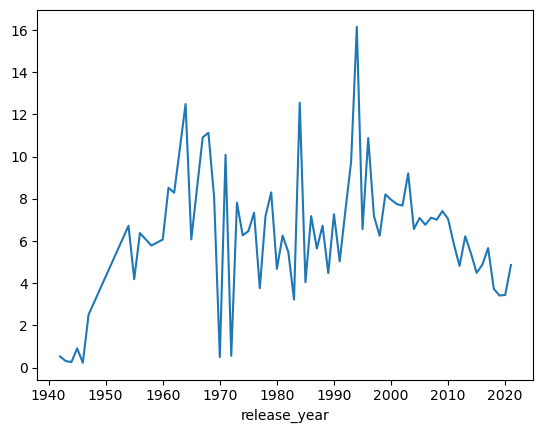

In [211]:
merged_df.groupby('release_year')['popularity'].mean().plot()


The analysis shows trends in popularity over years, helping to understand temporal patterns in streaming performance

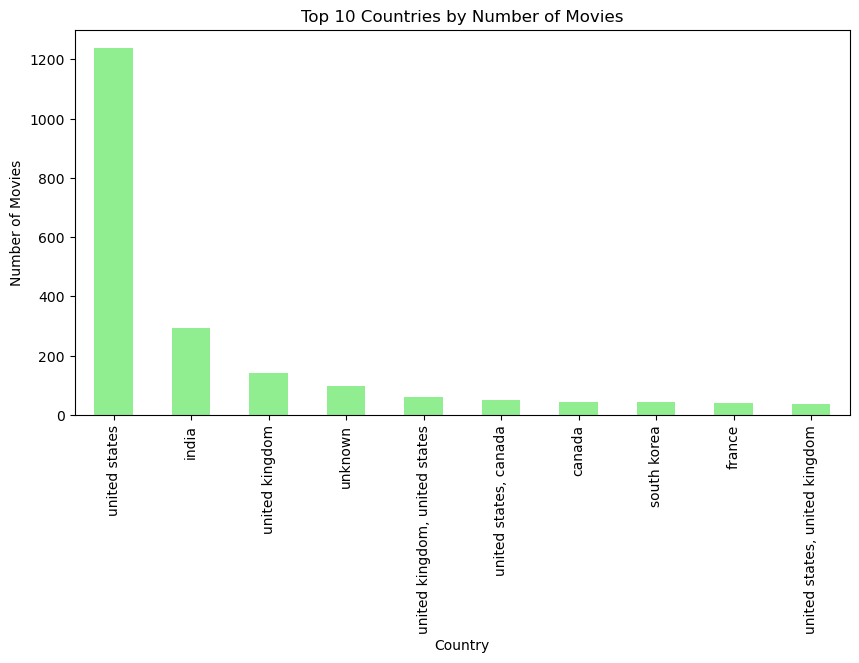

In [213]:
import matplotlib.pyplot as plt

country_counts = merged_df['country'].value_counts().head(10)
country_counts.plot(kind='bar', figsize=(10,5), color='lightgreen')
plt.title('Top 10 Countries by Number of Movies')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.show()


The bar chart shows the top 10 countries with the most movies in the merged dataset. The United States has the highest number of movies, followed by countries like India, the United Kingdom, and Canada. This indicates that most Netflix content comes from a few major countries, while other countries contribute fewer movies. The chart highlights the geographic distribution of movie production and shows where Netflix focuses most of its content.